# EDA IS ALL YOU NEED

## 数据清洗

+ 晚上[20: 8], power>1 数据处理

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import warnings
import datetime as dt
from sklearn.metrics import mean_absolute_error
warnings.filterwarnings("ignore")

def load_dataset(plant):
    train = pd.read_csv(f'../data/train_{plant}.csv', parse_dates=["时间"]).drop_duplicates().reset_index(drop=True)
    test = pd.read_csv(f'../data/test_{plant}.csv', parse_dates=["时间"])
    train.columns = ['time', 'irr', 'ws', 'wd', 'temp', 'pr', 'hm', 'mirr', 'power']
    test.columns = ['id', 'time', 'irr', 'ws', 'wd', 'temp', 'pr', 'hm']
    data = pd.concat([train, test])
    data['time'] = data['time'] + dt.timedelta(seconds=1.)
    return data

dataset = []
for i in range(1, 5):
    dataset.append(load_dataset(i))

In [78]:
def look_data(df):
    train = df.id.isnull()
    test = df.id.notnull()
    train_start = df[train].time.dt.date.min()
    train_end = df[train].time.dt.date.max()
    test_start = df[test].time.dt.date.min()
    test_end = df[test].time.dt.date.max()
    print(f'shape {df.shape}')
    print(f'train: {train_start} to {train_end}, test: {test_start} to {test_end}')
    train_size = 4 * 24 * pd.date_range(train_start, train_end).size
    test_size = 4 * 24 * pd.date_range(test_start, test_end).size
    print(f'train loss {train_size - train.sum()} samples, test loss {test_size - test.sum()} samples')

In [89]:
look_data(dataset[0])
print('-'*40)
look_data(dataset[1])
print('-'*40)
look_data(dataset[2])
print('-'*40)
look_data(dataset[3])

shape (78666, 10)
train: 2016-04-01 to 2018-04-30, test: 2018-05-01 to 2018-08-31
train loss 6102 samples, test loss 0 samples
----------------------------------------
shape (58443, 10)
train: 2017-01-02 to 2018-04-30, test: 2018-05-01 to 2018-09-30
train loss 2709 samples, test loss 0 samples
----------------------------------------
shape (35973, 10)
train: 2017-08-01 to 2018-07-31, test: 2018-08-01 to 2018-10-08
train loss 5248 samples, test loss 443 samples
----------------------------------------
shape (56581, 10)
train: 2017-01-02 to 2018-04-29, test: 2018-05-01 to 2018-09-29
train loss 3681 samples, test loss 698 samples


In [129]:
d

,hm,id,irr,mirr,power,pr,temp,time,wd,ws
0,-0.062500,NaN,-1.000000,0.00000,0.00000,0.393939,-0.486869,2017-01-02 00:00:00.993,340,-0.811321
1,-0.062500,NaN,-1.000000,0.00000,0.00000,0.393939,-0.490909,2017-01-02 00:15:00.993,342,-0.811321
2,-0.041667,NaN,-1.000000,0.00000,0.00000,0.393939,-0.494949,2017-01-02 00:30:00.993,346,-0.801887
3,-0.041667,NaN,-1.000000,0.00000,0.00000,0.333333,-0.498990,2017-01-02 00:45:00.993,349,-0.801887
4,-0.041667,NaN,-1.000000,0.00000,0.00000,0.333333,-0.503030,2017-01-02 01:00:00.993,349,-0.801887
5,-0.020833,NaN,-1.000000,0.00000,0.00000,0.333333,-0.507071,2017-01-02 01:15:00.993,349,-0.801887
6,0.000000,NaN,-1.000000,0.00000,0.00000,0.333333,-0.515152,2017-01-02 01:30:00.993,349,-0.801887
7,0.000000,NaN,-1.000000,0.00000,0.00000,0.333333,-0.523232,2017-01-02 01:45:00.993,347,-0.792453
8,0.020833,NaN,-1.000000,0.00000,0.00000,0.333333,-0.527273,2017-01-02 02:00:00.993,343,-0.801887
9,0.041667,NaN,-1.000000,0.00000,0.00000,0.333333,-0.535354,2017-01-02 02:15:00.993,341,-0.801887


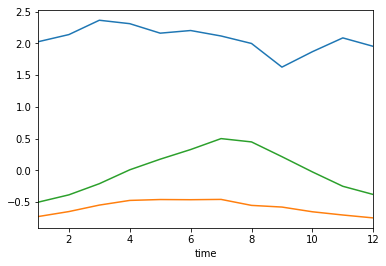

In [126]:
d=dataset[0][dataset[0].id.isnull()]
d.groupby(d.time.dt.month)['power'].mean().plot()
d.groupby(d.time.dt.month)['irr'].mean().plot()
d.groupby(d.time.dt.month)['temp'].mean().plot()

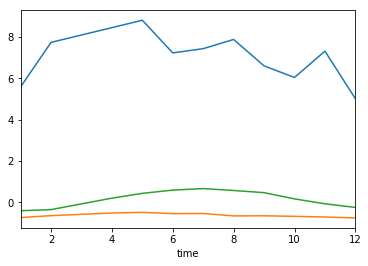

In [127]:
d=dataset[2][dataset[2].id.isnull()]
d.groupby(d.time.dt.month)['power'].mean().plot()
d.groupby(d.time.dt.month)['irr'].mean().plot()
d.groupby(d.time.dt.month)['temp'].mean().plot()

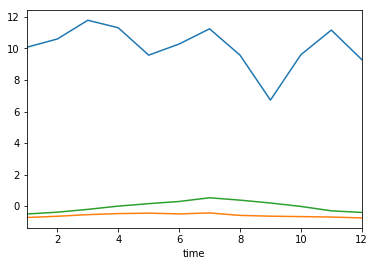

In [128]:
d=dataset[3][dataset[3].id.isnull()]
d.groupby(d.time.dt.month)['power'].mean().plot()
d.groupby(d.time.dt.month)['irr'].mean().plot()
d.groupby(d.time.dt.month)['temp'].mean().plot()

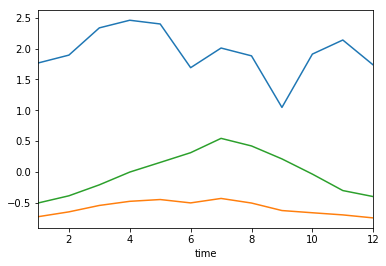

In [125]:
d=dataset[1][dataset[1].id.isnull()]
d.groupby(d.time.dt.month)['power'].mean().plot()
d.groupby(d.time.dt.month)['irr'].mean().plot()
d.groupby(d.time.dt.month)['temp'].mean().plot()

In [124]:
d[d.time.dt.month == 9].time.dt.hour.value_counts().sort_index()

0     112
1     112
2     112
3     112
4     112
5     112
6     112
7     112
8     112
9     112
10    112
11    112
12    112
13    112
14    114
15    116
16    116
17    116
18    116
19    116
20    116
21    116
22    116
23    116
Name: time, dtype: int64

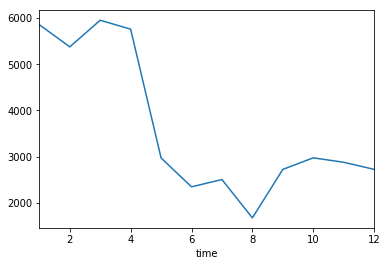

In [118]:
d.groupby(d.time.dt.month)['power'].count().plot()

In [145]:
c = d.groupby([d.time.dt.month, d.time.dt.hour])['irr'].agg({
    "min": "min",
    "1": lambda x: np.percentile(x, 1),
    "3": lambda x: np.percentile(x, 3),
    "Q1": lambda x: np.percentile(x, 25),
    "Q3": lambda x: np.percentile(x, 75),
})

In [146]:
c

min         1         3        Q1        Q3
time time                                                  
1    0    -1.000000 -1.000000 -1.000000 -1.000000 -1.000000
     1    -1.000000 -1.000000 -1.000000 -1.000000 -1.000000
     2    -1.000000 -1.000000 -1.000000 -1.000000 -1.000000
     3    -1.000000 -1.000000 -1.000000 -1.000000 -1.000000
     4    -1.000000 -1.000000 -1.000000 -1.000000 -1.000000
     5    -1.000000 -1.000000 -1.000000 -1.000000 -1.000000
     6    -1.000000 -1.000000 -1.000000 -1.000000 -1.000000
     7    -1.000000 -1.000000 -1.000000 -1.000000 -1.000000
     8    -1.000000 -1.000000 -1.000000 -1.000000 -0.925856
     9    -0.948669 -0.910951 -0.891141 -0.835551 -0.711027
     10   -0.838403 -0.760171 -0.722129 -0.589354 -0.433460
     11   -0.682510 -0.592034 -0.508650 -0.291350 -0.131179
     12   -0.519011 -0.476084 -0.372471 -0.036597  0.078422
     13   -0.456274 -0.388916 -0.309240  0.043251  0.148289
     14   -0.355513 -0.318840 -0.301122 -0.000475  0.131179
     15   -0.534221 -0.488004 -0.405741 -0.190114 -0.011407
     16   -0.682510 -0.634163 -0.597757 -0.454373 -0.266160
     17   -0.884030 -0.875608 -0.858764 -0.760456 -0.580798
     18   -0.990494 -0.988593 -0.988593 -0.971483 -0.912072
     19   -1.000000 -1.000000 -1.000000 -1.000000 -0.999049
     20   -1.000000 -1.000000 -1.000000 -1.000000 -1.000000
     21   -1.000000 -1.000000 -1.000000 -1.000000 -1.000000
     22   -1.000000 -1.000000 -1.000000 -1.000000 -1.000000
     23   -1.000000 -1.000000 -1.000000 -1.000000 -1.000000
2    0    -1.000000 -1.000000 -1.000000 -1.000000 -1.000000
     1    -1.000000 -1.000000 -1.000000 -1.000000 -1.000000
     2    -1.000000 -1.000000 -1.000000 -1.000000 -1.000000
     3    -1.000000 -1.000000 -1.000000 -1.000000 -1.000000
     4    -1.000000 -1.000000 -1.000000 -1.000000 -1.000000
     5    -1.000000 -1.000000 -1.000000 -1.000000 -1.000000
...             ...       ...       ...       ...       ...
11   18   -0.994297 -0.990133 -0.988593 -0.973384 -0.925856
     19   -1.000000 -1.000000 -1.000000 -1.000000 -0.999525
     20   -1.000000 -1.000000 -1.000000 -1.000000 -1.000000
     21   -1.000000 -1.000000 -1.000000 -1.000000 -1.000000
     22   -1.000000 -1.000000 -1.000000 -1.000000 -1.000000
     23   -1.000000 -1.000000 -1.000000 -1.000000 -1.000000
12   0    -1.000000 -1.000000 -1.000000 -1.000000 -1.000000
     1    -1.000000 -1.000000 -1.000000 -1.000000 -1.000000
     2    -1.000000 -1.000000 -1.000000 -1.000000 -1.000000
     3    -1.000000 -1.000000 -1.000000 -1.000000 -1.000000
     4    -1.000000 -1.000000 -1.000000 -1.000000 -1.000000
     5    -1.000000 -1.000000 -1.000000 -1.000000 -1.000000
     6    -1.000000 -1.000000 -1.000000 -1.000000 -1.000000
     7    -1.000000 -1.000000 -1.000000 -1.000000 -1.000000
     8    -1.000000 -1.000000 -1.000000 -0.994297 -0.924905
     9    -0.944867 -0.930494 -0.893289 -0.832224 -0.673004
     10   -0.828897 -0.806863 -0.758061 -0.526616 -0.367395
     11   -0.667300 -0.642624 -0.593270 -0.241445 -0.120722
     12   -0.500000 -0.483175 -0.461236 -0.041825  0.041825
     13   -0.433460 -0.428973 -0.425856  0.027567  0.089354
     14   -0.460076 -0.451103 -0.433156 -0.078422  0.024240
     15   -0.568441 -0.567319 -0.541654 -0.281844 -0.145913
     16   -0.739544 -0.722719 -0.694924 -0.586027 -0.391160
     17   -0.920152 -0.917909 -0.904639 -0.860266 -0.741445
     18   -0.996198 -0.995076 -0.994297 -0.990494 -0.972909
     19   -1.000000 -1.000000 -1.000000 -1.000000 -0.999525
     20   -1.000000 -1.000000 -1.000000 -1.000000 -1.000000
     21   -1.000000 -1.000000 -1.000000 -1.000000 -1.000000
     22   -1.000000 -1.000000 -1.000000 -1.000000 -1.000000
     23   -1.000000 -1.000000 -1.000000 -1.000000 -1.000000

[288 rows x 5 columns]

In [155]:
d.power.max()

48.834699999999998

In [163]:
d[(d.time.dt.hour<=16)&(d.time.dt.hour>=9)&(d.power<2)]

,hm,id,irr,mirr,power,pr,temp,time,wd,ws
804,0.458333,NaN,-0.887833,35.33330,1.126000,0.151515,-0.745455,2017-01-10 09:00:00.993,69,-0.867925
3300,-0.375000,NaN,-0.838403,24.00000,1.351670,-0.030303,-0.365657,2017-02-05 09:00:00.992,151,-0.905660
3492,0.291667,NaN,-0.859316,21.33330,1.213000,-0.030303,-0.494949,2017-02-07 09:00:00.992,140,-0.679245
3780,-0.020833,NaN,-0.857414,30.66670,1.827670,0.151515,-0.583838,2017-02-10 09:00:00.992,90,-0.707547
4962,0.083333,NaN,-0.484791,54.66670,1.725000,-0.030303,-0.377778,2017-02-22 16:30:00.992,103,-0.566038
4963,0.104167,NaN,-0.528517,53.33330,1.355330,0.030303,-0.381818,2017-02-22 16:45:00.992,103,-0.566038
5028,0.208333,NaN,-0.722433,87.33330,0.919333,0.272727,-0.595960,2017-02-23 09:00:00.992,112,-0.792453
5029,0.187500,NaN,-0.652091,98.66670,1.052330,0.272727,-0.583838,2017-02-23 09:15:00.992,106,-0.792453
5030,0.145833,NaN,-0.587452,106.66700,1.076000,0.272727,-0.571717,2017-02-23 09:30:00.992,103,-0.792453
5031,0.104167,NaN,-0.520913,147.00000,1.523330,0.272727,-0.555556,2017-02-23 09:45:00.992,98,-0.801887


In [160]:
d[(d.irr<=-0.6)&(d.power>=20)]

,hm,id,irr,mirr,power,pr,temp,time,wd,ws
135,0.000000,NaN,-0.726236,508.667,24.9357,0.272727,-0.498990,2017-01-03 09:45:00.993,291,-0.915094
136,-0.041667,NaN,-0.667300,559.333,28.0910,0.272727,-0.478788,2017-01-03 10:00:00.993,283,-0.915094
137,-0.083333,NaN,-0.600760,628.333,31.9903,0.272727,-0.458586,2017-01-03 10:15:00.993,283,-0.915094
231,-0.020833,NaN,-0.674905,510.000,24.8560,0.272727,-0.523232,2017-01-04 09:45:00.993,270,-0.849057
232,-0.062500,NaN,-0.602662,574.000,28.7317,0.272727,-0.494949,2017-01-04 10:00:00.993,270,-0.877358
327,-0.354167,NaN,-0.663498,522.000,25.0240,0.151515,-0.527273,2017-01-05 09:45:00.993,169,-0.905660
423,-0.458333,NaN,-0.667300,509.333,24.7397,0.030303,-0.636364,2017-01-06 09:45:00.993,229,-0.896226
520,-0.291667,NaN,-0.617871,473.667,23.3657,0.090909,-0.595960,2017-01-07 10:00:00.993,303,-0.745283
615,-0.333333,NaN,-0.718631,496.000,24.4930,-0.151515,-0.559596,2017-01-08 09:45:00.993,60,-0.924528
616,-0.354167,NaN,-0.659696,564.667,28.3480,-0.151515,-0.539394,2017-01-08 10:00:00.993,50,-0.924528


In [154]:
d[d.time>='2017-08-20 10']

,hm,id,irr,mirr,power,pr,temp,time,wd,ws
22108,0.625000,NaN,-0.726236,209.60000,11.35330,0.212121,0.357576,2017-08-20 10:00:00.988,96,-0.830189
22109,0.625000,NaN,-0.703422,156.60000,9.33233,0.212121,0.361616,2017-08-20 10:15:00.988,105,-0.811321
22110,0.625000,NaN,-0.682510,165.40000,9.55567,0.212121,0.365657,2017-08-20 10:30:00.988,110,-0.811321
22111,0.604167,NaN,-0.661597,84.26670,5.19833,0.212121,0.369697,2017-08-20 10:45:00.988,115,-0.801887
22112,0.583333,NaN,-0.640684,54.40000,2.89967,0.212121,0.373737,2017-08-20 11:00:00.988,121,-0.783019
22113,0.583333,NaN,-0.621673,46.40000,2.56400,0.212121,0.377778,2017-08-20 11:15:00.988,124,-0.764151
22114,0.583333,NaN,-0.604563,101.06700,5.86067,0.212121,0.381818,2017-08-20 11:30:00.988,126,-0.754717
22115,0.583333,NaN,-0.589354,257.00000,14.50900,0.212121,0.381818,2017-08-20 11:45:00.988,127,-0.754717
22116,0.562500,NaN,-0.572243,407.26700,23.20470,0.212121,0.385859,2017-08-20 12:00:00.988,128,-0.735849
22117,0.562500,NaN,-0.560837,447.66700,23.82800,0.212121,0.385859,2017-08-20 12:15:00.988,126,-0.726415


In [149]:
d[(d.time.dt.hour==13)&(d.irr<=-0.5)]

,hm,id,irr,mirr,power,pr,temp,time,wd,ws
22120,0.562500,NaN,-0.539924,480.6000,21.53100,0.151515,0.389899,2017-08-20 13:00:00.988,125,-0.726415
22121,0.562500,NaN,-0.539924,649.0670,32.54300,0.151515,0.389899,2017-08-20 13:15:00.988,124,-0.716981
22122,0.583333,NaN,-0.543726,775.4000,38.09530,0.151515,0.389899,2017-08-20 13:30:00.988,124,-0.716981
22123,0.583333,NaN,-0.547529,709.4670,34.22430,0.090909,0.389899,2017-08-20 13:45:00.988,122,-0.707547
22312,0.520833,NaN,-0.572243,782.0670,26.62370,0.151515,0.369697,2017-08-22 13:00:00.988,289,-0.707547
22313,0.500000,NaN,-0.545627,327.4670,14.05370,0.151515,0.373737,2017-08-22 13:15:00.988,296,-0.735849
22600,0.604167,NaN,-0.543726,364.2670,20.48000,0.272727,0.248485,2017-08-25 13:00:00.988,107,-0.405660
22601,0.583333,NaN,-0.513308,273.1330,15.70100,0.272727,0.252525,2017-08-25 13:15:00.988,107,-0.405660
22792,0.666667,NaN,-0.530418,174.6000,8.47900,0.090909,0.321212,2017-08-27 13:00:00.988,90,-0.839623
22793,0.666667,NaN,-0.526616,296.4000,14.67430,0.090909,0.325253,2017-08-27 13:15:00.988,93,-0.811321


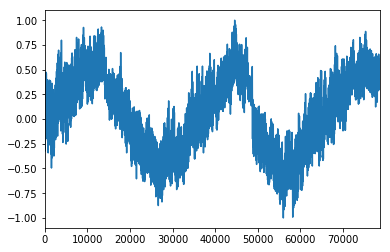

In [94]:
d.reset_index(drop=True)['temp'].plot()

In [43]:
pd.date_range("2018-01-01", "2018-02-01", freq="15MIN")

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 00:15:00',
               '2018-01-01 00:30:00', '2018-01-01 00:45:00',
               '2018-01-01 01:00:00', '2018-01-01 01:15:00',
               '2018-01-01 01:30:00', '2018-01-01 01:45:00',
               '2018-01-01 02:00:00', '2018-01-01 02:15:00',
               ...
               '2018-01-31 21:45:00', '2018-01-31 22:00:00',
               '2018-01-31 22:15:00', '2018-01-31 22:30:00',
               '2018-01-31 22:45:00', '2018-01-31 23:00:00',
               '2018-01-31 23:15:00', '2018-01-31 23:30:00',
               '2018-01-31 23:45:00', '2018-02-01 00:00:00'],
              dtype='datetime64[ns]', length=2977, freq='15T')

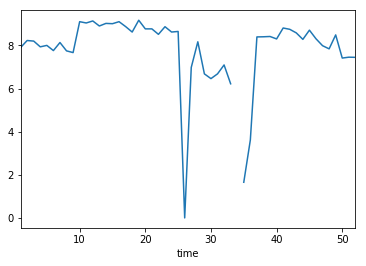

In [108]:
dataset[1].groupby(dataset[1].time.dt.weekofyear)['power'].max().plot()

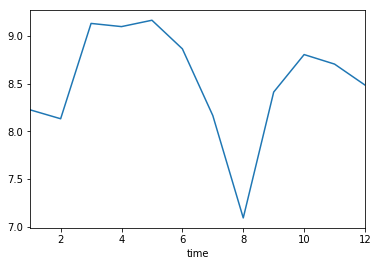

In [109]:
dataset[1].groupby(dataset[1].time.dt.month)['power'].max().plot()

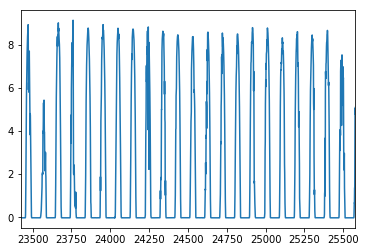

In [54]:
d[(d.time<='20161231')&(d.time>='20161201')]['power'].plot()

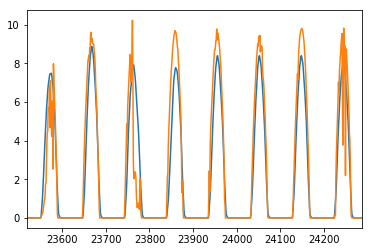

In [87]:
# d[(d.time<='20161210')&(d.time>='20161202')]['power'].plot()
((d[(d.time<='20161210')&(d.time>='20161202')]['irr'] + 1)*8).plot()
(d[(d.time<='20161210')&(d.time>='20161202')]['mirr']/100).plot()

In [81]:
pred = (d[d.id.isnull()]["irr"] + 1) * 8 

In [84]:
mean_absolute_error(d.power.dropna(), pred)

1.4045562707335977

In [63]:
temp = d[(d.time<='20161220')&(d.time>='20161201')]

In [64]:
temp.groupby(temp.time.dt.date).mean()

,hm,id,irr,mirr,power,pr,temp,wd,ws
time,,,,,,,,,
2016-12-01,-0.530921,NaN,-0.734331,267.237042,2.102160,0.458965,-0.409764,209.708333,-0.883746
2016-12-02,-0.410746,NaN,-0.761173,139.400018,0.896056,0.441288,-0.363131,215.645833,-0.742728
2016-12-03,-0.543860,NaN,-0.726359,257.155566,2.378118,0.593434,-0.336069,272.729167,-0.065153
2016-12-04,-0.548465,NaN,-0.757854,149.929555,1.410309,0.372475,-0.347938,236.239583,-0.628833
2016-12-05,-0.327851,NaN,-0.764000,256.103716,2.326878,0.609848,-0.248316,281.666667,-0.340900
2016-12-06,0.059430,NaN,-0.743422,257.507421,2.324465,0.552399,-0.307955,236.135417,-0.719733
2016-12-07,-0.098026,NaN,-0.745170,249.892372,2.279545,0.471591,-0.253283,262.218750,-0.451258
2016-12-08,-0.325877,NaN,-0.741714,265.107392,2.343114,0.272727,-0.293308,203.541667,-0.844045
2016-12-09,-0.286404,NaN,-0.749509,233.851860,2.084556,0.154040,-0.307955,231.447917,-0.923153


In [49]:
d.groupby([d.time.dt.year, d.time.dt.month])['power'].count()

time  time
2016  4       2879
      5       2976
      6       2880
      7       2976
      8       2976
      9       2880
      10      2976
      11      2880
      12      2156
2017  1       2974
      2       2688
      3       2849
      4       2879
      5       2973
      6       2879
      7       2976
      8       2974
      10      1440
      11      2152
      12      2975
2018  1       2976
      2       2688
      3       2976
      4       2880
      5          0
      6          0
      7          0
      8          0
Name: power, dtype: int64

## Power

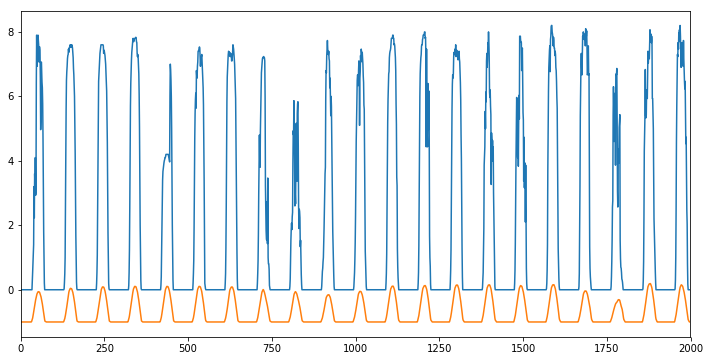

In [342]:
pl.iloc[: 2000]['power'].plot(figsize=(12, 6))
pl.iloc[: 2000]['irr'].plot(figsize=(12, 6))

In [343]:
max_power_time = pl[pl.id.isnull()].groupby(pl[pl.id.isnull()].time.dt.date).apply(lambda x: x.iloc[np.argmax(x.power.values), -3]).dropna()

In [344]:
max_power_time.dt.time.value_counts()

13:44:59.988000    9
08:59:59.990000    8
09:14:59.990000    7
13:44:59.985000    6
12:14:59.992000    6
12:59:59.988000    6
12:29:59.987000    6
13:59:59.992000    6
13:14:59.987000    6
12:59:59.987000    5
12:14:59.985000    5
11:59:59.991000    5
12:44:59.988000    5
12:29:59.984000    5
11:14:59.985000    4
10:59:59.992000    4
11:14:59.986000    4
15:14:59.986000    4
13:14:59.993000    4
10:29:59.991000    4
00:14:59.990000    4
13:59:59.985000    4
10:14:59.993000    4
11:44:59.985000    4
11:59:59.987000    4
13:14:59.988000    4
10:44:59.986000    4
11:14:59.991000    4
14:44:59.986000    4
10:59:59.986000    4
                  ..
14:14:59.991000    1
15:59:59.993000    1
14:29:59.994000    1
11:29:59.985000    1
10:29:59.986000    1
15:14:59.991000    1
12:44:59.990000    1
11:29:59.984000    1
23:59:59.994000    1
15:29:59.985000    1
08:44:59.989000    1
16:44:59.988000    1
14:44:59.988000    1
08:29:59.990000    1
10:14:59.992000    1
10:59:59.987000    1
00:14:59.9930

In [84]:
max_power_time[max_power_time.dt.hour >15]

time
2016-07-11   2016-07-11 16:30:00
2016-07-16   2016-07-16 16:45:00
2016-07-18   2016-07-18 17:45:00
2016-07-21   2016-07-21 16:00:00
2016-07-25   2016-07-25 16:00:00
2016-08-09   2016-08-09 16:00:00
2016-08-23   2016-08-23 16:15:00
2016-09-11   2016-09-11 16:00:00
2016-09-15   2016-09-15 16:45:00
2016-10-04   2016-10-04 16:30:00
2016-10-07   2016-10-07 16:00:00
2016-10-14   2016-10-14 16:30:00
2017-07-27   2017-07-27 16:45:00
2017-08-01   2017-08-01 16:45:00
dtype: datetime64[ns]

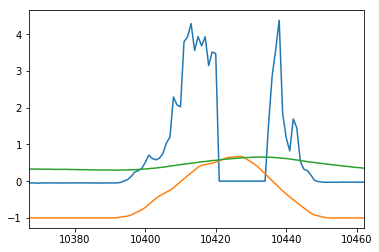

In [81]:
pl[(pl.time>='2016-07-18') & (pl.time<'2016-07-19')]['power'].plot()
pl[(pl.time>='2016-07-18') & (pl.time<'2016-07-19')]['irr'].plot()
pl[(pl.time>='2016-07-18') & (pl.time<'2016-07-19')]['temp'].plot()

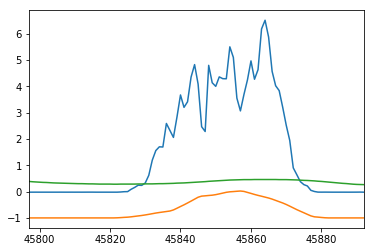

In [85]:
s1 = '2017-08-01'
s2 = s1[:-1] + str(int(s1[-1])+1)
pl[(pl.time>=s1) & (pl.time<s2)]['power'].plot()
pl[(pl.time>=s1) & (pl.time<s2)]['irr'].plot()
pl[(pl.time>=s1) & (pl.time<s2)]['temp'].plot()

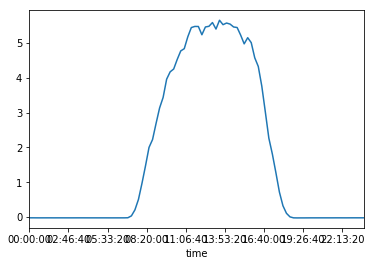

In [83]:
temp = pl[(pl.time>='2016-10-01') & (pl.time<'2016-10-31')]
temp.groupby(temp.time.dt.time)['power'].mean().plot()

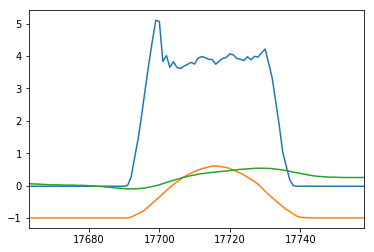

In [79]:
pl[(pl.time>='2016-10-02') & (pl.time<'2016-10-03')]['power'].plot()
pl[(pl.time>='2016-10-02') & (pl.time<'2016-10-03')]['irr'].plot()
pl[(pl.time>='2016-10-02') & (pl.time<'2016-10-03')]['temp'].plot()

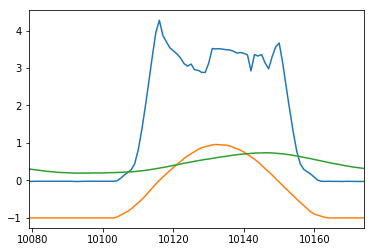

In [78]:
pl[(pl.time>='20160715') & (pl.time<'20160716')]['power'].plot()
pl[(pl.time>='20160715') & (pl.time<'20160716')]['irr'].plot()
pl[(pl.time>='20160715') & (pl.time<'20160716')]['temp'].plot()

In [90]:
pl['power'].diff(2).dropna().describe()

count    66856.000000
mean        -0.000001
std          0.918897
min         -8.376337
25%         -0.027083
50%          0.000000
75%          0.055000
max          8.404663
Name: power, dtype: float64

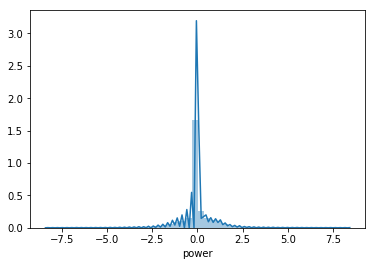

In [91]:
sns.distplot(pl['power'].diff(2).dropna())

In [104]:
np.percentile(pl['power'].diff(2).dropna().values,5)

-1.4646599999999999

In [112]:
pl['power_diff2'] = pl['power'].diff(2)
pl['power_diff1'] = pl['power'].diff(1)

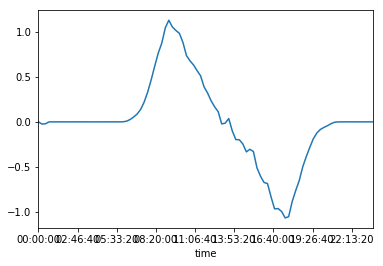

In [111]:
pl[pl.id.isnull()].groupby(pl[pl.id.isnull()].time.dt.time)['power_diff2'].mean().plot()

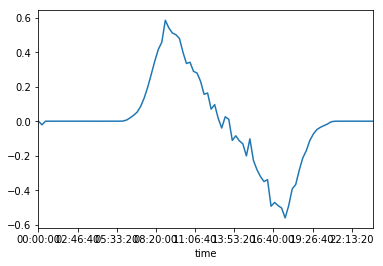

In [113]:
pl[pl.id.isnull()].groupby(pl[pl.id.isnull()].time.dt.time)['power_diff1'].mean().plot()

In [345]:
pl[pl.id.isnull()].groupby(pl[pl.id.isnull()].time.dt.hour)['power'].agg({
    'min': np.min,'.5':lambda x: np.percentile(x, .5), '1':lambda x: np.percentile(x, 1), 
    'mean': np.mean, 'max': np.max, 
                                                                          '99':lambda x: np.percentile(x, 99.5),
                                                                         })

,min,.5,1,mean,max,99
time,,,,,,
0,0.000000,0.000000,0.000000,0.021882,4.40000,0.600000
1,0.000000,0.000000,0.000000,0.021882,4.40000,0.600000
2,0.000000,0.000000,0.000000,0.021882,4.40000,0.600000
3,0.000000,0.000000,0.000000,0.021930,4.40000,0.600000
4,0.000000,0.000000,0.000000,0.021930,4.40000,0.600000
5,0.000000,0.000000,0.000000,0.022277,4.40000,0.600000
6,0.000000,0.000000,0.000000,0.093209,4.40000,1.639233
7,-0.006667,0.000000,0.000000,0.735091,5.93333,5.166670
8,-0.053333,-0.006667,0.000000,2.305274,7.52000,7.262270


In [166]:
pl[pl.id.isnull()].groupby(pl[pl.id.isnull()].time.dt.hour)['irr'].agg({
    'min': np.min,'.5':lambda x: np.percentile(x, .5), '1':lambda x: np.percentile(x, 1), 
    'mean': np.mean, 'median': np.median, 
                                                                          '99':lambda x: np.percentile(x, 99.5),
                                                                         })

,min,.5,1,mean,median,99
time,,,,,,
0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
1,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
2,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
3,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
4,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
5,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
6,-1.000000,-1.000000,-1.000000,-0.985249,-1.000000,-0.858624
7,-1.000000,-1.000000,-1.000000,-0.906194,-0.962300,-0.566362
8,-1.000000,-1.000000,-1.000000,-0.713262,-0.762488,-0.174364


In [162]:
pl.iloc[3600:3630]

,hm,id,irr,mirr,power,pr,temp,time,wd,ws,power_diff2,power_diff1,outlier,hour
3600,-0.368421,NaN,0.477851,1039.6400,6.667670,0.090909,0.402020,2016-05-08 12:15:00,288,-0.943396,-0.359660,-0.444660,1,12
3601,-0.410526,NaN,0.498586,1112.1800,4.774670,0.090909,0.418182,2016-05-08 12:30:00,288,-0.877358,-2.337660,-1.893000,0,12
3602,-0.452632,NaN,0.519321,1056.7100,4.932670,0.030303,0.438384,2016-05-08 12:45:00,292,-0.830189,-1.735000,0.158000,1,12
3603,-0.494737,NaN,0.541942,1131.0200,4.879000,-0.030303,0.458586,2016-05-08 13:00:00,293,-0.764151,0.104330,-0.053670,1,13
3604,-0.536842,NaN,0.524976,1041.7800,4.644000,-0.030303,0.474747,2016-05-08 13:15:00,293,-0.688679,-0.288670,-0.235000,1,13
3605,-0.557895,NaN,0.468426,835.2000,4.911330,-0.030303,0.486869,2016-05-08 13:30:00,295,-0.613208,0.032330,0.267330,1,13
3606,-0.600000,NaN,0.413761,203.7340,2.002670,-0.030303,0.498990,2016-05-08 13:45:00,294,-0.547170,-2.641330,-2.908660,1,13
3607,-0.642105,NaN,0.359095,212.6220,2.113000,-0.090909,0.515152,2016-05-08 14:00:00,294,-0.471698,-2.798330,0.110330,1,14
3608,-0.663158,NaN,0.295005,114.4890,1.091330,-0.090909,0.523232,2016-05-08 14:15:00,295,-0.396226,-0.911340,-1.021670,1,14
3609,-0.684211,NaN,0.223374,49.4220,0.432667,-0.090909,0.527273,2016-05-08 14:30:00,295,-0.320755,-1.680333,-0.658663,1,14


In [161]:
pl[(pl.time.dt.hour == 14) & (pl.power<=0.7)]

,hm,id,irr,mirr,power,pr,temp,time,wd,ws,power_diff2,power_diff1,outlier,hour
3609,-0.684211,NaN,0.223374,49.4220,0.432667,-0.090909,0.527273,2016-05-08 14:30:00,295,-0.320755,-1.680333,-0.658663,1,14
3610,-0.705263,NaN,0.149859,41.6000,0.357000,-0.151515,0.535354,2016-05-08 14:45:00,296,-0.254717,-0.734330,-0.075667,1,14
10423,-0.136842,NaN,0.630537,873.9560,0.000000,-0.272727,0.600000,2016-07-18 14:00:00,338,-0.650943,0.000000,0.000000,1,14
10424,-0.157895,NaN,0.653157,568.5330,0.000000,-0.272727,0.608081,2016-07-18 14:15:00,338,-0.641509,0.000000,0.000000,0,14
10425,-0.178947,NaN,0.658812,686.2220,0.000000,-0.272727,0.616162,2016-07-18 14:30:00,339,-0.632075,0.000000,0.000000,0,14
10426,-0.200000,NaN,0.666352,628.9780,0.000000,-0.272727,0.624242,2016-07-18 14:45:00,339,-0.622642,0.000000,0.000000,1,14
10905,-0.242105,NaN,0.438266,45.5110,0.501000,-0.393939,0.713131,2016-07-23 14:30:00,98,-0.216981,-1.060500,-0.946000,1,14
10906,-0.263158,NaN,0.353440,45.1557,0.428333,-0.393939,0.721212,2016-07-23 14:45:00,98,-0.160377,-1.018667,-0.072667,1,14
16473,-0.031579,NaN,0.198869,51.9113,0.572667,0.393939,0.349495,2016-09-19 14:30:00,322,-0.679245,-2.151663,-0.881663,1,14
16474,-0.052632,NaN,0.153629,69.6890,0.602000,0.333333,0.353535,2016-09-19 14:45:00,323,-0.660377,-0.852330,0.029333,1,14


In [152]:
pl['hour'] = pl['time'].dt.hour

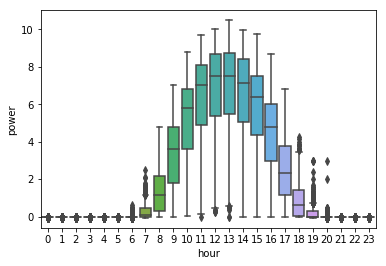

In [153]:
sns.boxplot(x='hour', y='power', data=pl[pl.id.isnull()])

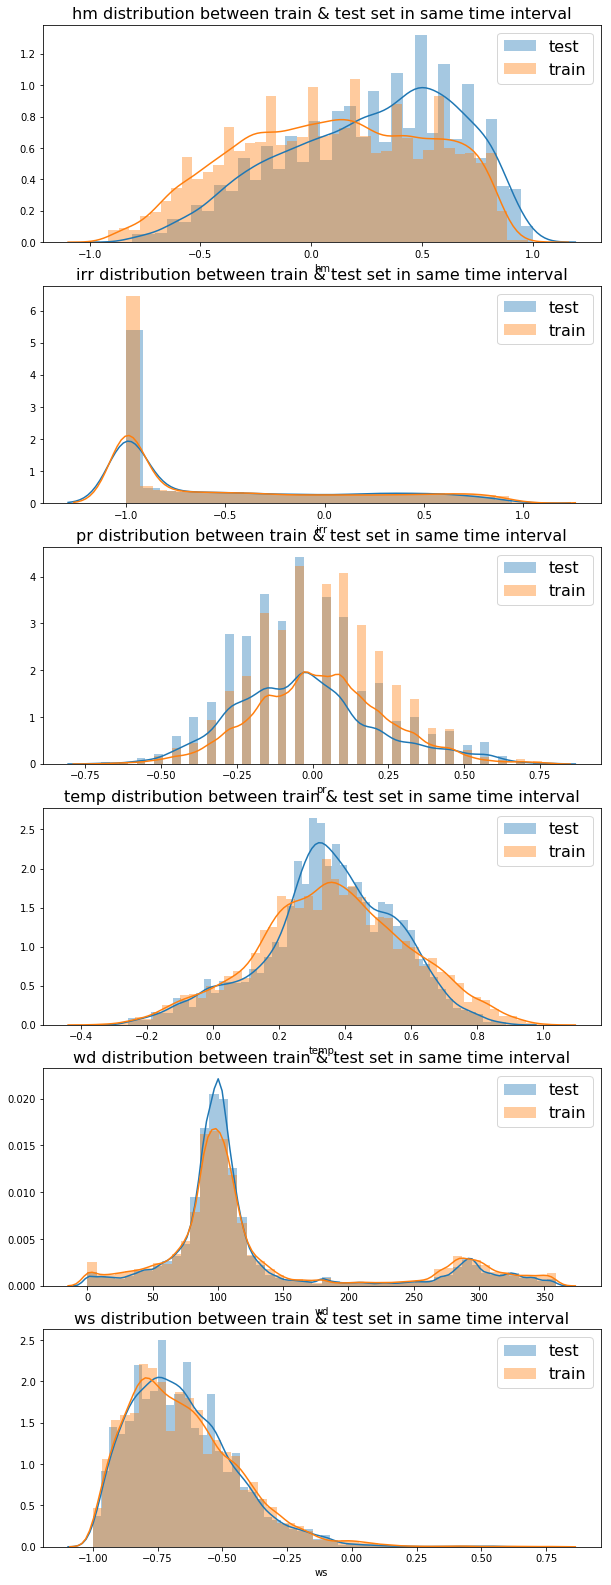

In [169]:
look_col = ['hm', 'irr', 'pr', 'temp', 'wd', 'ws']
f, axes = plt.subplots(len(look_col), figsize=(10, 28))
for i, col in enumerate(look_col):
    sns.distplot(pl[test & M5toM8][col], ax=axes[i], label="test")
    sns.distplot(pl[train & M5toM8][col], ax=axes[i], label="train")
    axes[i].legend(fontsize=16)
    axes[i].set_title(f'{col} distribution between train & test set in same time interval', size=16)

## Date Feature

useful date featear:
+ quarter(maybe)
+ month
+ hour
+ minute
+ night [21: 5]点

In [238]:
from chinese_calendar import is_holiday
pl['time'] = pl['time'] + dt.timedelta(seconds=1)
pl['year'] = pl.time.dt.year
pl['quarter'] = pl.time.dt.quarter
pl['month'] = pl.time.dt.month
pl['weekday'] = pl.time.dt.weekday
pl['holiday'] = pl.time.apply(is_holiday).astype(int)
pl['hour'] = pl.time.dt.hour

date_features = ['quarter', 'month', 'weekday', 'holiday', 'hour']

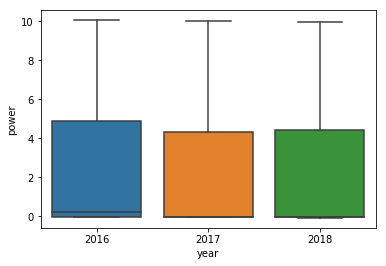

In [239]:
sns.boxplot(x='year', y='power', data=pl[pl.month<=4])

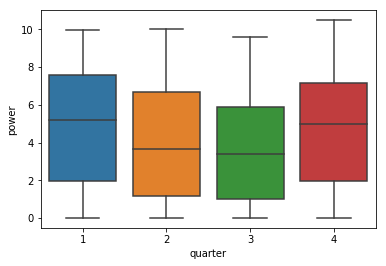

In [240]:
sns.boxplot(x='quarter', y='power', data=pl[pl.power>0])

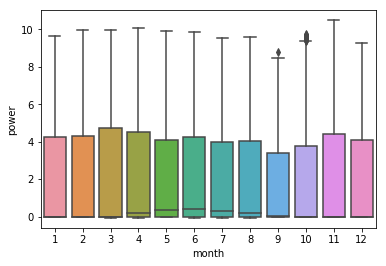

In [241]:
sns.boxplot(x='month', y='power', data=pl)

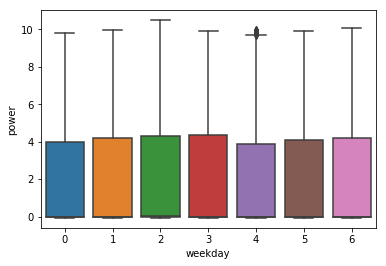

In [242]:
sns.boxplot(x='weekday', y='power', data=pl)

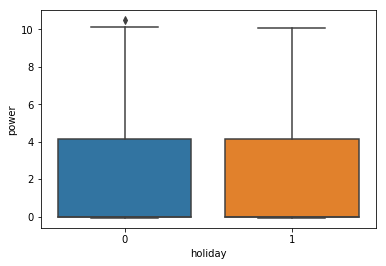

In [243]:
sns.boxplot(x='holiday', y='power', data=pl)

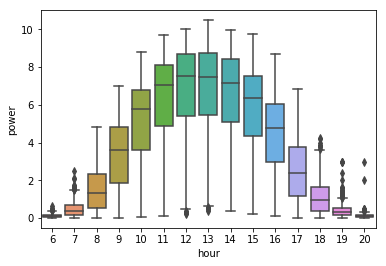

In [244]:
sns.boxplot(x='hour', y='power', data=pl[pl.power>0])

In [245]:
pl['hour'] = pl.time.dt.hour + pl.time.dt.minute / 60

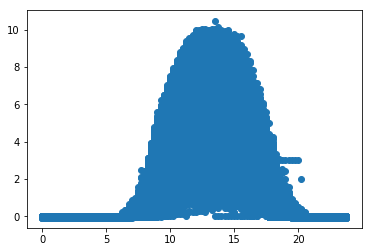

In [246]:
plt.scatter(pl[train]['hour'], pl[train]['power'])

In [247]:
pl[(train) & (pl.hour == 6)].groupby(pl.month)['power'].max()

month
1    -0.018000
2    -0.018000
3    -0.018000
4    -0.018000
5     0.000000
6     0.035667
7    -0.018333
8    -0.013000
9    -0.004000
10    0.000000
11   -0.018000
12   -0.019000
Name: power, dtype: float64

In [248]:
pl[(train) & (pl.hour == 20)].groupby(pl.month)['power'].agg({
    "mean": "mean", 
    ".5%": lambda x: np.percentile(x, .5),
    "99.5%": lambda x: np.percentile(x, 99.5),
    "max%": "max",
})

,mean,.5%,99.5%,max%
month,,,,
1,-0.020731,-0.022667,-0.018000,-0.018000
2,-0.021500,-0.023667,-0.018000,-0.018000
3,-0.025461,-0.069667,-0.014475,-0.013000
4,0.007226,-0.064962,1.664235,2.989000
5,0.035645,-0.025233,0.240067,0.255667
6,0.169711,-0.018568,0.477952,0.481000
7,0.152075,-0.039177,0.464527,0.469000
8,0.017231,-0.053910,0.276412,0.294000
9,-0.023900,-0.043695,-0.004725,-0.004000


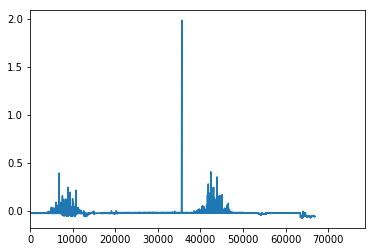

In [278]:
pl[(pl.hour>=20.25) | (pl.hour<=5.5)]['power'].plot()

In [279]:
night = (pl.hour>=21) | (pl.hour<=5)

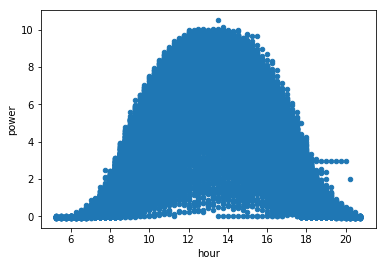

In [285]:
pl[~night].plot(x='hour', y='power', kind='scatter')

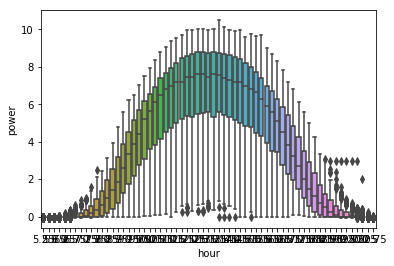

In [287]:
sns.boxplot(x='hour', y='power', data=pl[~night])

In [293]:
pl['night'] = 0
pl.loc[night, 'night'] = 1

In [299]:
pl.groupby('night')['power'].mean()

night
0    3.222134
1   -0.024306
Name: power, dtype: float64

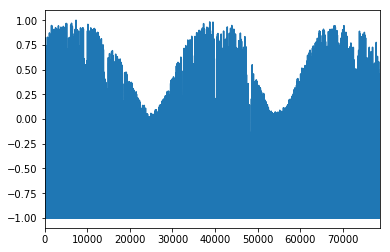

In [301]:
pl[~night]['irr'].plot()

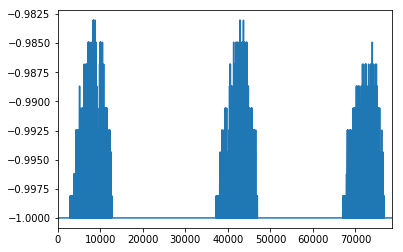

In [302]:
pl[night]['irr'].plot()

In [316]:
pl['irr_lvl'] = pd.cut(pl['irr'], 20, labels=[i for i in range(20)])

In [317]:
irr_month = pd.DataFrame(pl.groupby(['month', 'irr_lvl'])['power'].mean()).reset_index()

In [318]:
irr_month[irr_month.irr_lvl==5]

,month,irr_lvl,power
5,1,5,4.706691
18,2,5,3.597683
34,3,5,3.003748
53,4,5,2.437440
73,5,5,1.890634
93,6,5,2.416234
113,7,5,2.073717
133,8,5,2.430131
153,9,5,2.441186
170,10,5,3.489419


In [ ]:
irr_month[irr_month.irr_lvl==5]

In [348]:
pl['month'] = pl.time.dt.month
pl['hour'] = pl.time.dt.hour

In [351]:
month_hour = pd.DataFrame(pl.groupby(['month', 'hour'])['power'].mean()).reset_index()

In [359]:
month_hour[month_hour.hour==5]

,month,hour,power
5,1,5,0.000000
29,2,5,0.000000
53,3,5,0.000000
77,4,5,0.146667
101,5,5,0.001022
125,6,5,0.005139
149,7,5,0.000128
173,8,5,0.000000
197,9,5,0.000000
221,10,5,0.000000


In [360]:
month_hour[month_hour.hour==20]

,month,hour,power
20,1,20,0.000000
44,2,20,0.000000
68,3,20,0.000000
92,4,20,0.146667
116,5,20,0.000000
140,6,20,0.000000
164,7,20,0.000000
188,8,20,0.001373
212,9,20,0.000000
236,10,20,0.000000


In [376]:
irr_month[irr_month.irr_lvl==10]

,month,irr_lvl,power
10,1,10,7.657430
23,2,10,6.454650
39,3,10,5.589535
58,4,10,4.631156
78,5,10,4.606755
98,6,10,4.449867
118,7,10,4.332961
138,8,10,4.730678
158,9,10,4.328834
175,10,10,5.901836


In [362]:
from sklearn.model_selection import ParameterGrid

In [363]:
num_leaves

In [371]:
size = len(ParameterGrid(param_grid))
for i, p in enumerate(ParameterGrid(param_grid)):
    if i / size <= 0.2 and i / size >= 0.18:
        print(f'{i / size * 100: .1f}%',p)

 18.2% {'bagging_fraction': 0.7, 'boosting': 'gbdt', 'feature_fraction': 0.8, 'learning_rate': 0.03, 'n_iter': 175, 'num_leaves': 50, 'objective': 'regression', 'task': 'train'}
 18.4% {'bagging_fraction': 0.7, 'boosting': 'gbdt', 'feature_fraction': 0.8, 'learning_rate': 0.03, 'n_iter': 175, 'num_leaves': 50, 'objective': 'regression_l1', 'task': 'train'}
 18.6% {'bagging_fraction': 0.7, 'boosting': 'gbdt', 'feature_fraction': 0.8, 'learning_rate': 0.03, 'n_iter': 175, 'num_leaves': 31, 'objective': 'regression', 'task': 'train'}
 18.8% {'bagging_fraction': 0.7, 'boosting': 'gbdt', 'feature_fraction': 0.8, 'learning_rate': 0.03, 'n_iter': 175, 'num_leaves': 31, 'objective': 'regression_l1', 'task': 'train'}
 18.9% {'bagging_fraction': 0.7, 'boosting': 'gbdt', 'feature_fraction': 0.8, 'learning_rate': 0.03, 'n_iter': 225, 'num_leaves': 50, 'objective': 'regression', 'task': 'train'}
 19.1% {'bagging_fraction': 0.7, 'boosting': 'gbdt', 'feature_fraction': 0.8, 'learning_rate': 0.03, 'n_

In [379]:
pl[['mirr', 'irr','power']].corr()

,mirr,irr,power
mirr,1.000000,0.939332,0.885597
irr,0.939332,1.000000,0.845722
power,0.885597,0.845722,1.000000
